In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

In [8]:
df = pd.read_csv('untokenized_df.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54286 entries, 0 to 54285
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        54286 non-null  object
 1   text      54286 non-null  object
 2   device    54286 non-null  object
 3   likes     54286 non-null  int64 
 4   retweets  54286 non-null  int64 
 5   date      54286 non-null  object
 6   month     54286 non-null  int64 
 7   year      54286 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.3+ MB


In [10]:
df.head()

,id,text,device,likes,retweets,date,month,year
0,1698308935,Be sure to tune in and watch Donald Trump on L...,Twitter Web Client,939,519,2009-05-04 18:54:00,5,2009
1,1701461182,Donald Trump will be appearing on The View tom...,Twitter Web Client,259,34,2009-05-05 01:00:00,5,2009
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,37,15,2009-05-08 13:38:00,5,2009
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,29,11,2009-05-08 20:40:00,5,2009
4,1773561338,"""""""My persona will never be that of a wallflow...",Twitter Web Client,1877,1321,2009-05-12 14:07:00,5,2009


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
likes,54286.0,26549.730594,57050.577730,0.0,9.0,113.5,36128.25,1869706.0
retweets,54286.0,8263.859743,13136.908822,0.0,51.0,2617.5,12422.75,408866.0
month,54286.0,6.698375,3.430010,1.0,4.0,7.0,10.00,12.0
year,54286.0,2016.235751,2.860803,2009.0,2014.0,2016.0,2019.00,2021.0


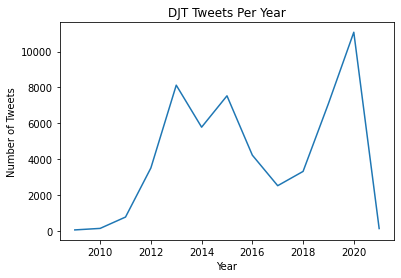

In [231]:
tweets_per_year = df.groupby('year').agg('count')['id']
_ = sns.lineplot(data=tweets_per_year)
plt.ylabel('Number of Tweets')
plt.xlabel('Year')
plt.title('DJT Tweets Per Year')
plt.savefig('tweets_over_time.png')
plt.show()

In [350]:
top_retweets = df.sort_values(by='retweets', ascending=False)[:10]

In [351]:
for i in range(10):
    print(f'{top_retweets.iloc[i].retweets}\n\t{top_retweets.iloc[i].text}')
    print()

408866
	Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!

293109
	#FraudNewsCNN #FNN

281289
	TODAY WE MAKE AMERICA GREAT AGAIN!

237674
	Are you allowed to impeach a president for gross incompetence?

235250
	RT @SpaceX: Liftoff!

226235
	A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!

217199
	"Why would Kim Jong-un insult me by calling me ""old,"" when I would NEVER call him ""short and fat?"" Oh well, I try so hard to be his friend - and maybe someday that will happen!"

211345
	Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War III.

210615
	The United States of America will be designating ANTIFA as a Terrorist Organization.

210614
	RT @realDonaldTrump: The United States of America will be designating ANTIFA as a Terrorist Organization.



In [356]:
top_retweets.iloc[6]

id                                         929511000000000000
text        "Why would Kim Jong-un insult me by calling me...
device                                     Twitter Web Client
likes                                                  534338
retweets                                               217199
date                                      2017-11-12 00:48:00
month                                                      11
year                                                     2017
Name: 32316, dtype: object

In [367]:
df.sort_values(by='likes',ascending=False).iloc[56]

id                                         929511000000000000
text        "Why would Kim Jong-un insult me by calling me...
device                                     Twitter Web Client
likes                                                  534338
retweets                                               217199
date                                      2017-11-12 00:48:00
month                                                      11
year                                                     2017
Name: 32316, dtype: object

In [383]:
top_likes = df.sort_values(by='likes', ascending=False)[:15]
for i in range(15):
    print(f'{top_likes.iloc[i].likes}\n\t{top_likes.iloc[i].text}')
    print()

1869706
	Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!

1219870
	Going welI, I think! Thank you to all. LOVE!!!

1188311
	I WON THIS ELECTION, BY A LOT!

1023598
	WE WILL WIN!

978022
	71,000,000 Legal Votes. The most EVER for a sitting President!

955972
	WE ARE LOOKING REALLY GOOD ALL OVER THE COUNTRY. THANK YOU!

924802
	I will be making a statement tonight. A big WIN!

904558
	VOTE! VOTE! VOTE!.

835413
	MERRY CHRISTMAS!

821423
	A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!

788277
	The United States of America will be designating ANTIFA as a Terrorist Organization.

764501
	CHINA!

748645
	STOP THE COUNT!

730357
	I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law & Order – respect the Law and our great men and women in Blue. Thank you!


In [385]:
top_likes.iloc[14]

id                                        1325780000000000000
text        STOCK MARKET UP BIG, VACCINE COMING SOON. REPO...
device                                     Twitter for iPhone
likes                                                  720091
retweets                                                96671
date                                      2020-11-09 12:31:00
month                                                      11
year                                                     2020
Name: 53045, dtype: object

In [389]:
df.sort_values(by='retweets',ascending=False).iloc[97]

id                                        1325780000000000000
text        STOCK MARKET UP BIG, VACCINE COMING SOON. REPO...
device                                     Twitter for iPhone
likes                                                  720091
retweets                                                96671
date                                      2020-11-09 12:31:00
month                                                      11
year                                                     2020
Name: 53045, dtype: object

In [162]:
text = list(df.text)

# Text Analysis Pre-treatment
def text_breakdown(input_text):
    output_text = input_text
    output_text = output_text.replace('"', '')
    output_text = output_text.split()
    output_text = list(map(lambda x: re.sub('^[\W]*','',x), output_text))
    while '' in output_text:
        output_text.remove('')
    if len(output_text) > 0:
        output_text[-1] = re.sub('\W$', '', output_text[-1])
    return output_text

word_text = list(map(lambda x: text_breakdown(x), text))


In [163]:
counter = Counter()

In [164]:
for tweet in word_text:
    for word in tweet:
        counter[word]+=1

In [165]:
text_df = pd.DataFrame(counter.keys(), columns=['word'])
text_df['count'] = counter.values()

In [160]:
first_words = Counter()
skip_words = ['RT', 'WhiteHouse:', 'realDonaldTrump:', 'TeamTrump:', 'GOPChairwoman:']
for tweet in text:
    if len(tweet)>0:
        i = 0
        while tweet[i] in skip_words:
            i+=1
        first_words[tweet[i].lower()]+=1
    
fw_df = pd.DataFrame(first_words.keys(), columns=['word'])
fw_df['count'] = first_words.values()

In [169]:
# top 20 first word of a tweet
top_words = list(fw_df.sort_values(by='count', ascending=False)['word'][:20])
print(top_words)

['the', 'i', 'thank', 'we', 'great', 'my', 'just', 'a', 'via', 'if', 'president', 'congratulations', 'it', 'so', 'this', 'will', 'our', 'why', 'in', 'when']


In [186]:
def at_target(text):
    text = text.split()
    targets = []
    for word in text:
        if word[0] == '@':
            targets.append(word.strip(":|.|\""))
    if len(targets) == 0:
        targets = ['None']
    return targets

tweet_targets = list(df.text.apply(lambda x: at_target(x)))

target_count = Counter()
for targets in tweet_targets:
    for target in targets:
        target_count[target]+=1

at_df = pd.DataFrame(target_count.keys(), columns = ['target'])
at_df['count'] = target_count.values()
at_df = at_df.drop(2).drop(0)

In [220]:
top_ats = list(at_df.sort_values(by='count', ascending=False)['target'][:21])
top_ats.remove('@realDonaldTrump')
print(top_ats)

['@FoxNews', '@WhiteHouse', '@foxandfriends', '@BarackObama', '@ApprenticeNBC', '@CNN', '@TeamTrump', '@IvankaTrump', '@seanhannity', '@MittRomney', '@GOP', '@GOPChairwoman', '@DonaldJTrumpJr', '@DanScavino', '@BreitbartNews', '@EricTrump', '@Jim_Jordan', '@nytimes', '@POTUS', '@megynkelly']


In [221]:
df.text.apply(lambda x: any(at in x for at in top_ats)).sum()

6879

In [222]:
df.year.min()

2009

In [223]:
mention_dict = {mention : [df[df.year == year]['text'].apply(lambda x: mention in x).sum() for year in range(2009,2022)] for mention in top_ats}

In [224]:
mention_df = pd.DataFrame(mention_dict)
mention_df = mention_df.set_index(np.arange(2009,2022))
mention_df

,@FoxNews,@WhiteHouse,@foxandfriends,@BarackObama,@ApprenticeNBC,@CNN,@TeamTrump,@IvankaTrump,@seanhannity,@MittRomney,@GOP,@GOPChairwoman,@DonaldJTrumpJr,@DanScavino,@BreitbartNews,@EricTrump,@Jim_Jordan,@nytimes,@POTUS,@megynkelly
2009,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,18,0,8,157,2,4,0,1,1,2,0,0,4,0,0,3,0,0,0,1
2012,21,1,38,540,11,10,0,18,5,284,8,0,6,0,1,13,0,2,0,1
2013,23,0,33,11,118,8,0,44,9,0,36,0,17,11,15,27,0,2,0,0
2014,28,0,94,6,53,9,0,38,21,1,6,0,15,8,15,21,0,4,0,1
2015,255,0,133,3,211,157,0,70,65,16,38,0,29,23,35,25,0,22,2,97
2016,100,0,39,1,0,100,36,25,19,6,10,0,29,23,1,37,0,55,4,54
2017,48,54,97,1,0,17,1,22,11,0,11,3,4,5,1,15,4,29,40,0
2018,79,100,55,1,0,9,0,17,8,1,14,5,1,8,6,16,0,9,23,0


In [322]:
exclude_list = ['None', '@realDonaldTrump', '@realdonaldtrump', '@']
targets_by_year_dict = {year: Counter() for year in np.arange(2009,2022)}
for year in np.arange(2009,2021):
    targets_in_year = df[df['year'] == year].text.apply(lambda x: at_target(x))
    for targets in targets_in_year:
        for target in targets:
            target = re.split("'|,|!",target)[0]
            if target not in exclude_list:
                targets_by_year_dict[year][target]+=1
            

In [323]:
TOP_N = 10

top_by_year = {}
top_by_year_counts = {}

for year in np.arange(2009,2022):
    top_targets = targets_by_year_dict[year].most_common(TOP_N)
    top_counts = [target[1] for target in top_targets]
    top_targets = [target[0] for target in top_targets]
    top_by_year[year] = top_targets
    top_by_year_counts[year] = top_counts

In [324]:
for year in top_by_year.keys():
    print(year)
    for item in top_by_year[year]:
        print('\t'+item)

2009
	@IvankaTrump
2010
	@hollyrpeete
	@kingsthings
2011
	@BarackObama
	@FoxNews
	@Israel
	@gretawire
	@foxandfriends
	@Lawrence
	@TeamCavuto
	@JonHuntsman
	@lawrence
	@ralphreed
2012
	@BarackObama
	@MittRomney
	@CelebApprentice
	@foxandfriends
	@SquawkCNBC
	@gretawire
	@Yankees
	@RickSantorum
	@FoxNews
	@Newsmax_Media
2013
	@ApprenticeNBC
	@CelebApprentice
	@billmaher
	@DannyZuker
	@NYMag
	@IvankaTrump
	@AlexSalmond
	@GOP
	@mcuban
	@foxandfriends
2014
	@foxandfriends
	@TrumpDoral
	@TrumpChicago
	@ApprenticeNBC
	@nflcommish
	@MikeAndMike
	@AGSchneiderman
	@IvankaTrump
	@Macys
	@AlexSalmond
2015
	@FoxNews
	@ApprenticeNBC
	@CNN
	@foxandfriends
	@megynkelly
	@oreillyfactor
	@seanhannity
	@IvankaTrump
	@Macys
	@JebBush
2016
	@CNN
	@FoxNews
	@megynkelly
	@nytimes
	@HillaryClinton
	@foxandfriends
	@EricTrump
	@TeamTrump
	@oreillyfactor
	@DonaldJTrumpJr
2017
	@foxandfriends
	@WhiteHouse
	@FoxNews
	@POTUS
	@FLOTUS
	@nytimes
	@IvankaTrump
	@VP
	@Scavino45
	@EricTrump
2018
	@WhiteHouse
	@FoxNews

In [318]:
for year in top_by_year_counts.keys():
    print(year)
    for item in top_by_year_counts[year]:
        print('\t'+str(item))

2009
	1
2010
	1
	1
2011
	140
	18
	14
	12
	8
	7
	5
	5
	4
	4
2012
	500
	267
	43
	38
	38
	26
	24
	20
	20
	19
2013
	110
	66
	63
	55
	43
	42
	39
	36
	34
	31
2014
	92
	61
	56
	46
	45
	35
	30
	27
	26
	26
2015
	219
	193
	136
	124
	95
	90
	63
	61
	54
	52
2016
	95
	88
	53
	53
	45
	39
	34
	30
	28
	26
2017
	95
	48
	44
	38
	36
	28
	22
	22
	20
	14
2018
	79
	75
	54
	40
	40
	22
	17
	16
	16
	15
2019
	239
	141
	111
	108
	101
	83
	83
	78
	65
	64
2020
	435
	226
	205
	107
	105
	104
	103
	92
	88
	80
2021


In [325]:
def find_hashtags(input_text):
    t = input_text.split()
    tag_list = []
    for word in t:
        if word[0] == "#":
            tag_list.append(word)
    return tag_list

In [326]:
hashtag_list = df.text.apply(lambda x: find_hashtags(x))

hash_counter = Counter()

for entry in hashtag_list:
    for tag in entry:
        hash_counter[tag]+=1

In [327]:
hash_counter.most_common(10)

[('#Trump2016', 501),
 ('#MAGA', 397),
 ('#MakeAmericaGreatAgain', 278),
 ('#CelebApprentice', 220),
 ('#Trump2016"""', 170),
 ('#1', 109),
 ('#CelebrityApprentice', 83),
 ('#MakeAmericaGreatAgain"""', 71),
 ('#AmericaFirst', 70),
 ('#KAG2020', 62)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54286 entries, 0 to 54285
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        54286 non-null  object
 1   text      54286 non-null  object
 2   device    54286 non-null  object
 3   likes     54286 non-null  int64 
 4   retweets  54286 non-null  int64 
 5   date      54286 non-null  object
 6   month     54286 non-null  int64 
 7   year      54286 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.3+ MB


In [407]:
all_loss = pd.read_csv('all_loss.csv')
recent_loss = pd.read_csv('recent_loss.csv')

In [408]:
all_loss = all_loss.drop(columns=['Unnamed: 0'])
recent_loss = recent_loss.drop(columns=['Unnamed: 0'])

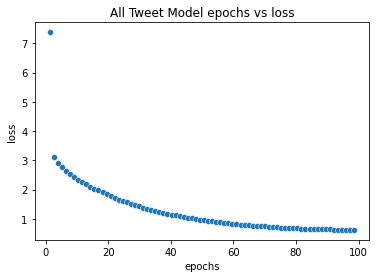

In [409]:
sns.scatterplot(x='0', y='1', data=all_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('All Tweet Model epochs vs loss')
plt.savefig('all_tweet_loss_plot.png')

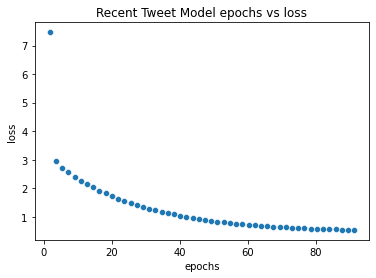

In [410]:
sns.scatterplot(x='0', y='1', data=recent_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Recent Tweet Model epochs vs loss')
plt.savefig('recent_tweet_loss_plot.png')